# Aim

Learning preprocessing on Twitter Dataset using NLTK

In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/h/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
all_positive_tweets = twitter_samples.strings("positive_tweets.json")
all_negative_tweets = twitter_samples.strings("negative_tweets.json")

In [4]:
type(all_positive_tweets), type(all_positive_tweets[0]), len(all_positive_tweets[0])

(list, str, 111)

In [5]:
print("# of positive tweets: ", len(all_positive_tweets))
print("# of negative tweets: ", len(all_negative_tweets))

# of positive tweets:  5000
# of negative tweets:  5000


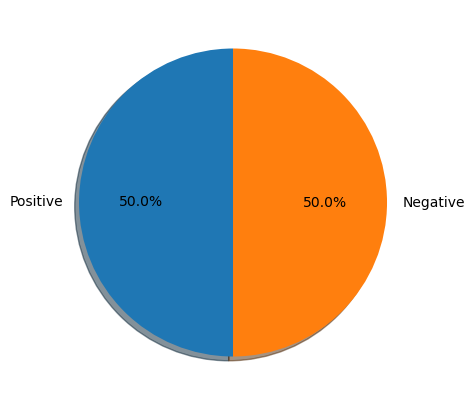

In [6]:
fig = plt.figure(figsize=(5, 5))

labels = ("Positive", "Negative")
sizes = (len(all_positive_tweets), len(all_negative_tweets))

plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()


In [7]:
print("\033[92m", all_positive_tweets[random.randint(0, 4999)])
print("\033[90m" + "---------------")
print("\033[91m" + all_negative_tweets[random.randint(0, 4999)])


 @ealilovic Don't get your hope up, you must travel a million years to get there in the first place :) #fls #sorry
---------------
LOL really?"@PraiseKINGDAVID: @_Milli__ unlike me :("


## Steps

1. Tokenizing the strings
2. Lowercasing
3. Removing stop words
4. Stemming/lemmatization

In [8]:
# sample; choosen to be complex enough to exemplify steps
tweet = all_positive_tweets[2277]
print('\033[92m' + tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [9]:
# for data for removing stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/h/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

Removing hyperlinks, usernames and hastags. (**Data specific reformatting**)

In [11]:
print("\033[92m" + tweet)
print("\033[90m")

# cleaning the old retweet style "RT"
tweet2 = re.sub(r"RT[\s]", "", tweet)
print(tweet2)
print("\n")

# removing hyperlinks
tweet3 = re.sub(r"https?://[^\s\n\r]+", "", tweet2)
print(tweet3)
print("\n")

# removing hashtags
# Only removing the hash # sign from the word
tweet4 = re.sub(r'#', '', tweet3)
print(tweet4)
print('\n')

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 




### Tokenization

TweetTokenizer can also perform the lowercasing using the `perserve_case=False` argument.

In [12]:
print('\033[92m' + tweet4)

print('\033[94m')

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweet_tokens = tokenizer.tokenize(tweet4)

print()
print('Tokenized string:')
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### Removing Stop Words and Punctuations

In [13]:
stopwords_english = stopwords.words('english')

print('Stop words \n')
print(stopwords_english)

print('\nPunctuations\n')
print(string.punctuation)


Stop words 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [17]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweet_clean = []

for word in tweet_tokens:
    if (word not in stopwords_english and words not in string.punctuation):
        tweet_clean.append(word)

print('\nremoved stop words and punctuations: \n')
print(tweet_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


removed stop words and punctuations: 

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


### Stemming

Converts words to their stem

We will be using the PorterStemmer module from NLTK. There are multiple options for this.

Some opinions:

<https://stackoverflow.com/questions/24647400/what-is-the-best-stemming-method-in-python>
> Stemmers vary in their aggressiveness. Porter is one of the monst aggressive stemmer for English. I find it usually hurts more than it helps. On the lighter side you can either use a lemmatizer instead as already suggested, or a lighter algorithmic stemmer. The limitation of lemmatizers is that they cannot handle unknown words.

>Personally I like the Krovetz stemmer which is a hybrid solution, combing a dictionary lemmatizer and a light weight stemmer for out of vocabulary words. Krovetz also kstem or light_stemmer option in Elasticsearch. There is a python implementation on pypi https://pypi.org/project/KrovetzStemmer/, though that is not the one that I have used.

Basically there are other options that are better, but for now let's move on with this one.

In [18]:
print('\n\033[92m')
print(tweet_clean)
print('\033[94m')

stemmer = PorterStemmer()

tweet_stem = [stemmer.stem(word) for word in tweet_clean]

print('\n Stemmed words:')
print(tweet_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


 Stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


### Convert to a couple of functions

Let's automate the process for all tweets by collecting the steps into a single function.

In [29]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

nltk.download('stopwords')


def process_tweet(tweet: str) -> list:
    # step 1: Cleaning Tweets
    # cleaning the old retweet style "RT"
    tweet = re.sub(r"RT[\s]", "", tweet)

    # removing hyperlinks
    tweet = re.sub(r"https?://[^\s\n\r]+", "", tweet)

    # removing hashtags
    # Only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # Step2: Tokenize and lowercasing
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

    tweet_tokens = tokenizer.tokenize(tweet)

    # Step 3: remove stop words
    stopwords_english = stopwords.words('english')
    
    tweet_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and words not in string.punctuation):
            tweet_clean.append(word)

    # Step 4:Stemming
    stemmer = PorterStemmer()

    tweet_stem = [stemmer.stem(word) for word in tweet_clean]

    return tweet_stem

[nltk_data] Downloading package stopwords to /home/h/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
print('\033[92m')
print(tweet)
print('\033[94m')

tweets_stem = process_tweet(tweet)

print('\nPreprocessed Tweet:')
print(tweets_stem)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Preprocessed Tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


## Frequency Count

In [32]:
from collections import Counter

positive_freq = Counter()
negative_freq = Counter()

for twt in all_positive_tweets:
    positive_freq.update(process_tweet(twt))

for twt in all_negative_tweets:
    negative_freq.update(process_tweet(twt))

print(positive_freq)
print(negative_freq)

Counter({':)': 3691, '!': 1844, '.': 1273, ',': 963, ':-)': 701, ':d': 658, 'thank': 643, '?': 579, ')': 520, 'follow': 447, 'love': 400, '...': 290, '"': 254, ':': 249, 'day': 246, 'u': 245, 'good': 238, 'like': 233, '-': 213, 'happi': 212, 'get': 209, 'see': 186, "i'm": 183, '&': 174, 'hi': 173, 'great': 172, 'back': 163, 'know': 155, 'go': 151, 'new': 146, 'hope': 143, ':p': 139, 'look': 139, '<3': 135, 'one': 131, '..': 129, 'time': 128, 'friday': 116, 'us': 115, 'today': 113, 'work': 111, 'morn': 101, 'make': 100, "'": 100, 'pleas': 99, 'nice': 99, 'want': 98, "i'll": 91, 'much': 89, 'lot': 87, 'via': 85, 'would': 84, 'week': 83, 'let': 83, '(': 82, 'well': 81, 'enjoy': 79, '1': 79, 'realli': 79, 'need': 78, 'hey': 77, 'ye': 77, 'weekend': 75, 'birthday': 74, 'welcom': 73, '*': 73, 'x': 72, 'come': 71, 'think': 71, 'wait': 70, 'got': 69, 'thing': 69, 'night': 68, 'keep': 68, '>': 68, 'arriv': 67, "that'": 67, 'alway': 67, '/': 66, 'best': 65, 'tweet': 65, 'lol': 64, 'friend': 64, 

In [34]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

data = [[word, positive_freq.get(word, 0), negative_freq.get(word,0)] for word in keys]

data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

In [48]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data, columns=['word', 'positive_freq', 'negative_freq'])
df

,word,positive_freq,negative_freq
0,happi,212,25
1,merri,1,0
2,nice,99,19
3,good,238,101
4,bad,18,73
5,sad,5,123
6,mad,4,11
7,best,65,22
8,pretti,20,15
9,❤,29,21


/extra-home/miniconda3/envs/xgboost/envs/nlp/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


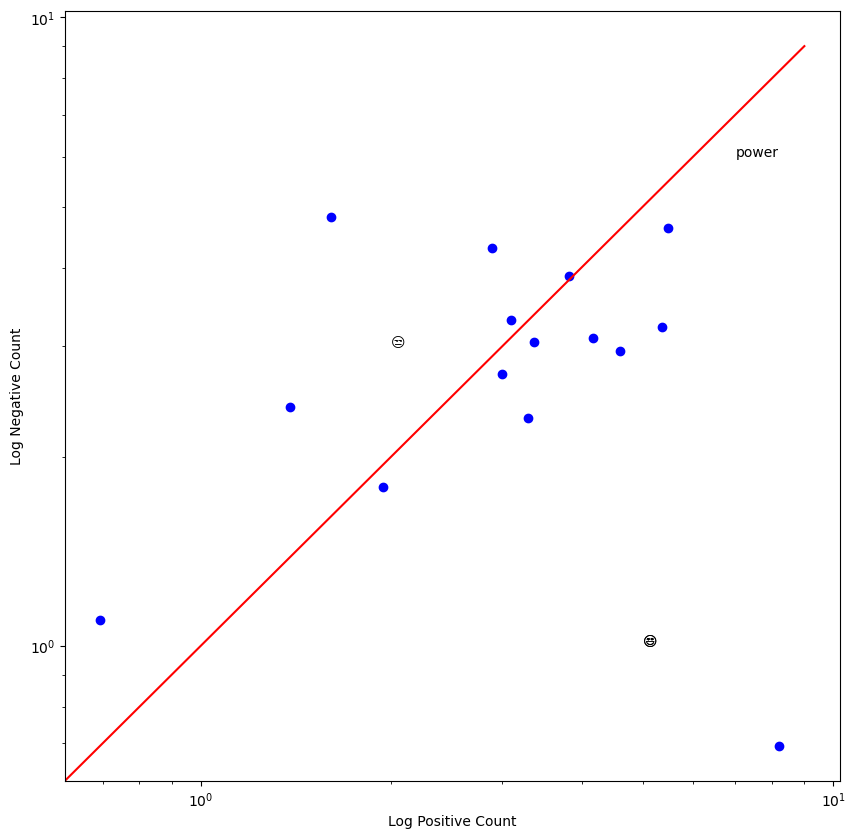

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(np.log(df['positive_freq']), np.log(df['negative_freq']), c='blue',)

plt.xlabel("Log Positive Count")
plt.ylabel("Log Negative Count")

for i in range(len(df)):
    ax.annotate(df.loc[i, 'word'], (df.loc[i,'positive_freq'], df.loc[i,'negative_freq']))

ax.plot([0,9], [0,9], color='r') # plot the slope equals 1 line
plt.show()

<Axes: xlabel='positive_freq', ylabel='negative_freq'>

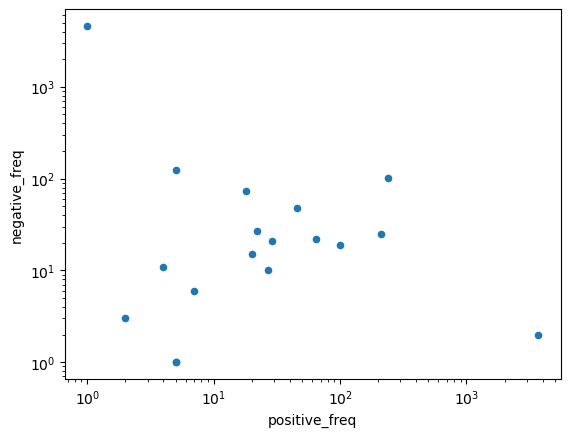

In [53]:
# df.set_index('word').plot(x='positive_freq', y='negative_freq',kind='scatter', logx=True, logy=True)